In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
Sales=pd.read_csv("C:/Users/HP/Downloads/Compressed/Sales.csv/Sales1.csv")

In [3]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38840 entries, 0 to 38839
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              38840 non-null  object
 1   Day               38840 non-null  int64 
 2   Month             38840 non-null  object
 3   Year              38840 non-null  int64 
 4   Customer_Age      38840 non-null  int64 
 5   Age_Group         38840 non-null  object
 6   Customer_Gender   38840 non-null  object
 7   Country           38840 non-null  object
 8   State             38840 non-null  object
 9   Product_Category  38840 non-null  object
 10  Sub_Category      38840 non-null  object
 11  Product           38840 non-null  object
 12  Order_Quantity    38840 non-null  int64 
 13  Unit_Cost         38840 non-null  int64 
 14  Unit_Price        38840 non-null  int64 
 15  Profit            38840 non-null  int64 
 16  Cost              38840 non-null  int64 
 17  Revenue     

In [4]:
Sales.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,3/27/2014,27,March,2014,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
1,3/27/2016,27,March,2016,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,407,315,722
2,7/19/2013,19,July,2013,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
3,7/19/2015,19,July,2015,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
4,7/13/2013,13,July,2013,43,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,10,45,120,726,450,1176


In [5]:
Shape = Sales.shape
Rows=Shape[0]
Col= Shape[1]
print(f"Rows of DataSet is :  {Rows}")
print(f"Columns of DataSet is :  {Col}")

Rows of DataSet is :  38840
Columns of DataSet is :  18


In [6]:
Sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
Sales['Date'] = pd.to_datetime(Sales['Date'])

In [8]:
Sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2014-03-27,27,March,2014,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
1,2016-03-27,27,March,2016,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,407,315,722
2,2013-07-19,19,July,2013,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
3,2015-07-19,19,July,2015,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
4,2013-07-13,13,July,2013,43,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,10,45,120,726,450,1176


In [9]:
Sales["Calculated_Date"]= Sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
Sales["Calculated_Date"]=pd.to_datetime(Sales['Calculated_Date'])

In [10]:
Sales["Calculated_Date"].head()

0   2014-03-27
1   2016-03-27
2   2013-07-19
3   2015-07-19
4   2013-07-13
Name: Calculated_Date, dtype: datetime64[ns]

In [11]:
Sales.info()
Sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38840 entries, 0 to 38839
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              38840 non-null  datetime64[ns]
 1   Day               38840 non-null  int64         
 2   Month             38840 non-null  object        
 3   Year              38840 non-null  int64         
 4   Customer_Age      38840 non-null  int64         
 5   Age_Group         38840 non-null  object        
 6   Customer_Gender   38840 non-null  object        
 7   Country           38840 non-null  object        
 8   State             38840 non-null  object        
 9   Product_Category  38840 non-null  object        
 10  Sub_Category      38840 non-null  object        
 11  Product           38840 non-null  object        
 12  Order_Quantity    38840 non-null  int64         
 13  Unit_Cost         38840 non-null  int64         
 14  Unit_Price        3884

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000
mean,15.680716,2014.411432,37.391684,12.200824,238.967456,408.675051,283.152369,432.014933,715.167302
std,8.769127,1.262985,11.299034,9.516001,527.439524,889.955447,470.373229,843.098455,1282.702578
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000
25%,8.000000,2013.000000,29.000000,3.000000,2.000000,5.000000,27.000000,27.000000,59.000000
50%,16.000000,2014.000000,37.000000,11.000000,8.000000,22.000000,87.000000,91.000000,197.000000
75%,23.000000,2016.000000,45.000000,20.000000,38.000000,55.000000,342.000000,377.000000,754.000000
max,31.000000,2016.000000,79.000000,32.000000,2171.000000,3578.000000,5638.000000,8684.000000,14026.000000


In [12]:
Sales[['Unit_Cost', 'Unit_Price']].describe()
Sales[['Unit_Cost', 'Unit_Price']].mean()
Sales[['Unit_Cost', 'Unit_Price']].median()

Unit_Cost      8.0
Unit_Price    22.0
dtype: float64

<Axes: >

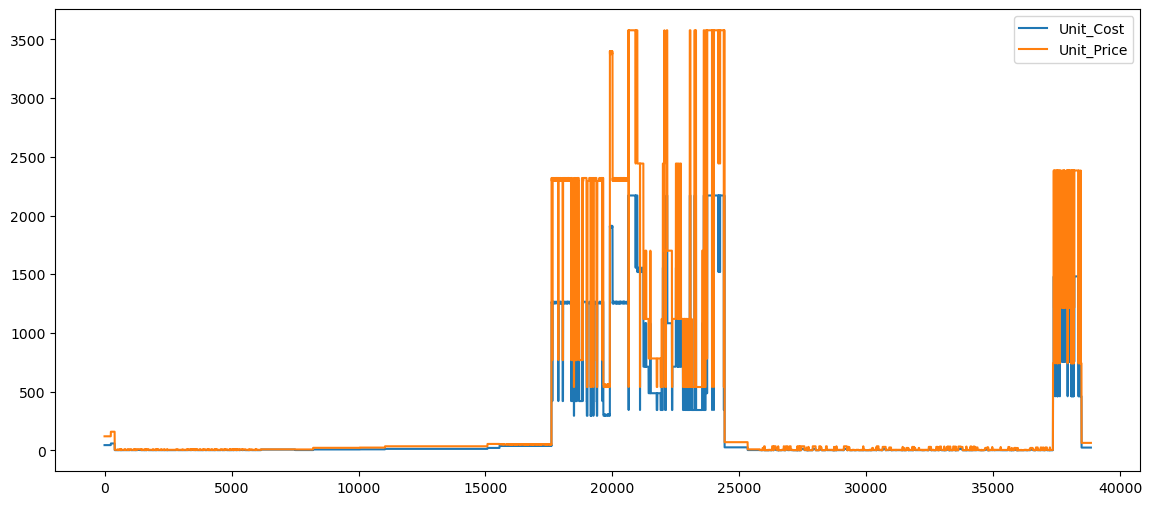

In [13]:
Sales[['Unit_Cost', 'Unit_Price']].plot(kind="line",figsize=(14,6),legend=True)

Text(0, 0.5, 'Sales')

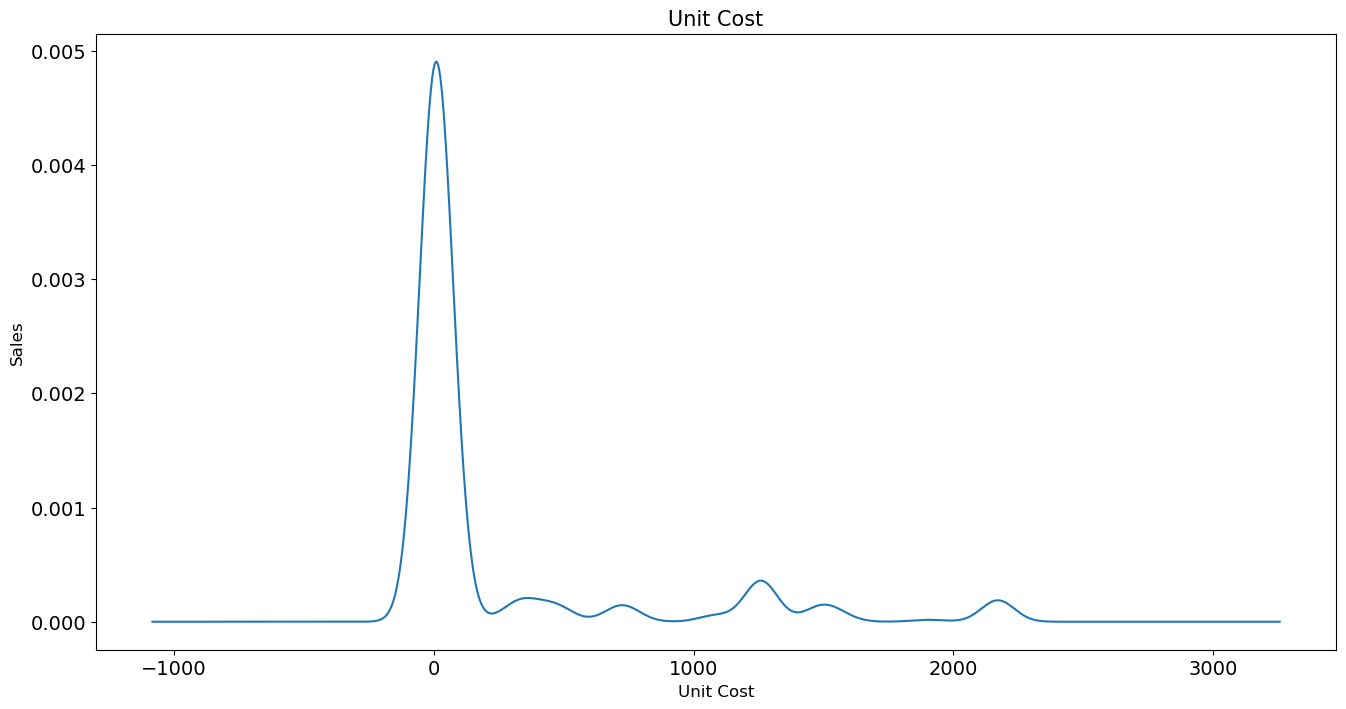

In [14]:
Sales['Unit_Cost'].plot(kind="density" , figsize=(16,8), fontsize=14)
plt.title("Unit Cost",fontsize=15)
plt.xlabel("Unit Cost",fontsize=12)
plt.ylabel("Sales",fontsize=12)


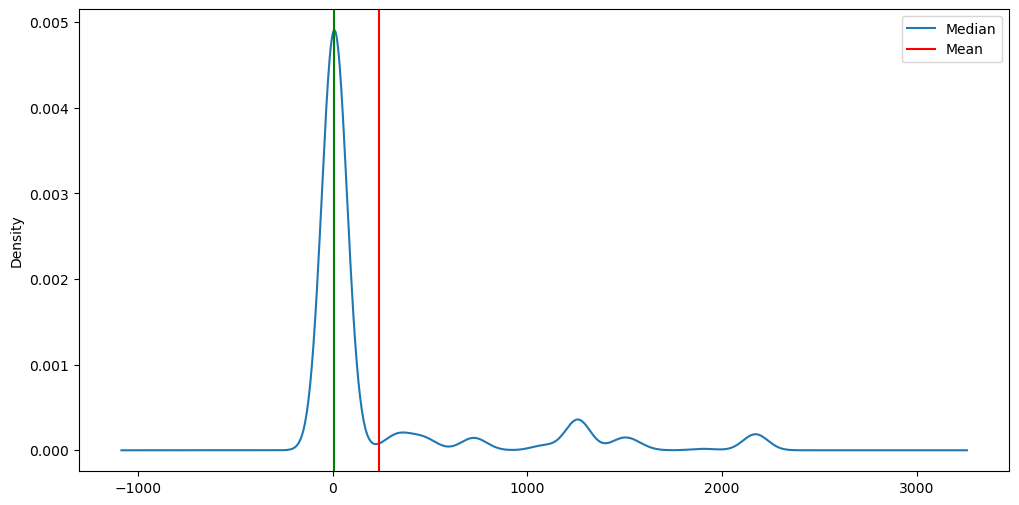

In [15]:
ax=Sales['Unit_Cost'].plot(kind="density" , figsize=(12,6))
mean= ax.axvline(Sales['Unit_Cost'].mean(), color='red' )
median = ax.axvline(Sales['Unit_Cost'].median(), color='g')
plt.legend({'Median':median,'Mean':mean})


Text(0.5, 0, 'Dollars')

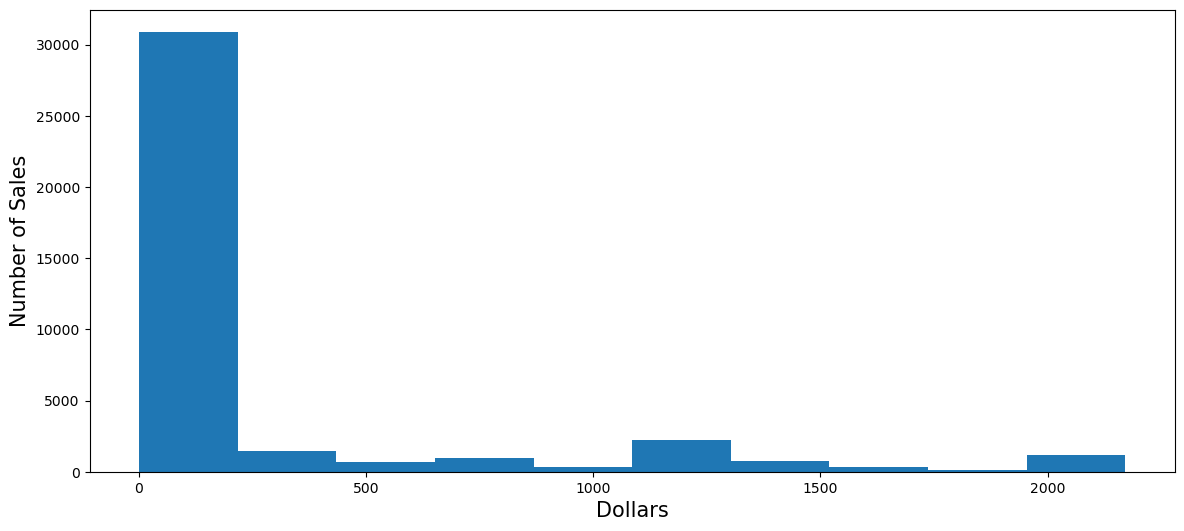

In [16]:
ax = Sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales', fontsize=15)
ax.set_xlabel('Dollars', fontsize=15)

In [17]:
Sales["Customer_Age"].value_counts().mean()

658.3050847457627

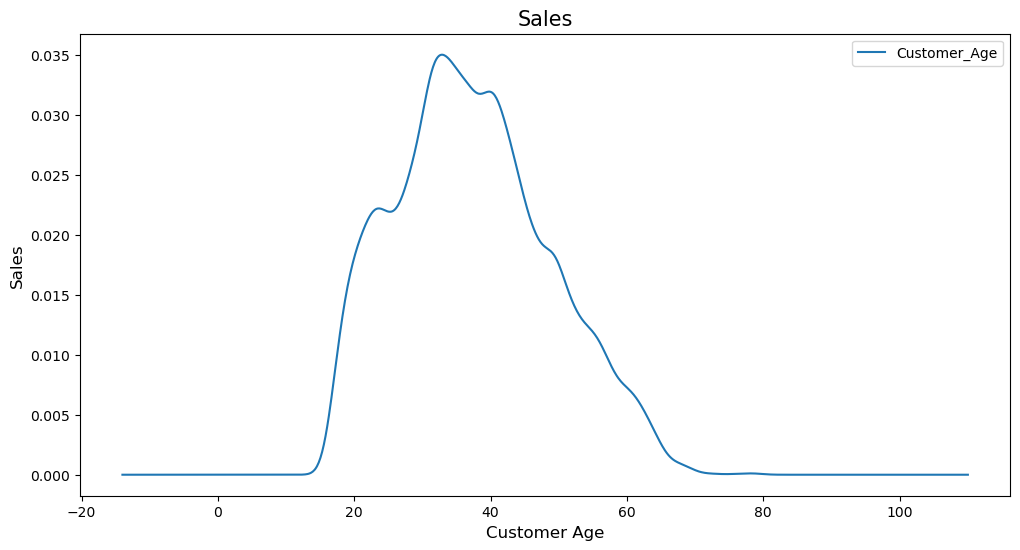

In [18]:
Sales["Customer_Age"].plot(kind='kde',figsize=(12,6))
plt.title("Sales",fontsize=15)
plt.xlabel("Customer Age",fontsize=12)
plt.ylabel("Sales",fontsize=12)
plt.legend()



May          4008
December     3983
June         3765
April        3388
March        3233
November     3161
January      3099
October      3076
February     2970
August       2906
September    2701
July         2550
Name: Month, dtype: int64

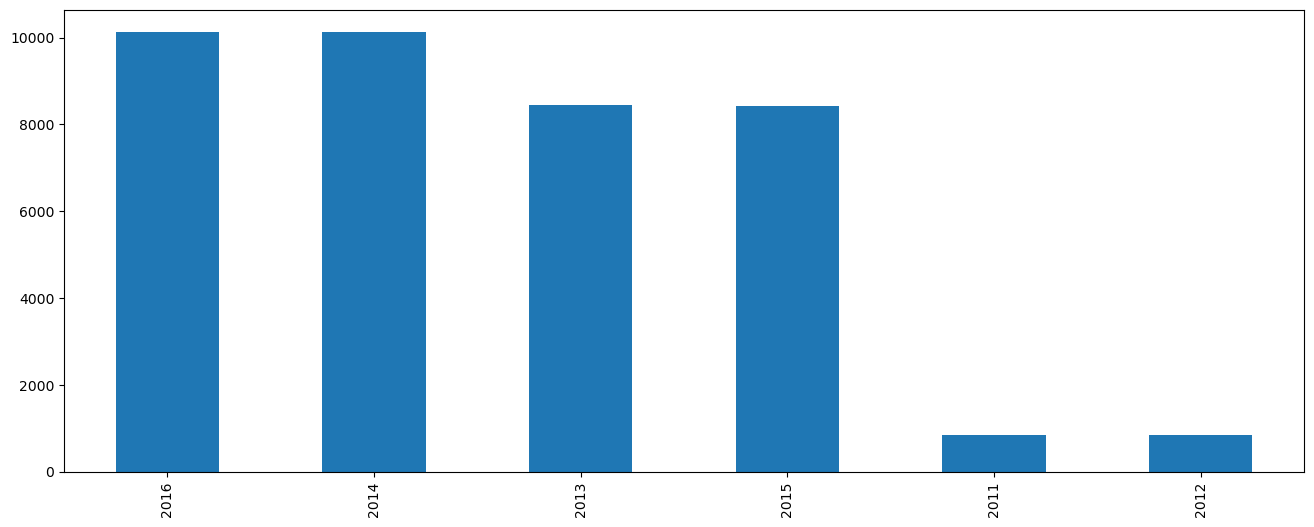

In [19]:
Sales['Year'].value_counts()

Sales["Year"].value_counts().plot(kind="bar",figsize=(16,6))

Sales['Month'].value_counts()


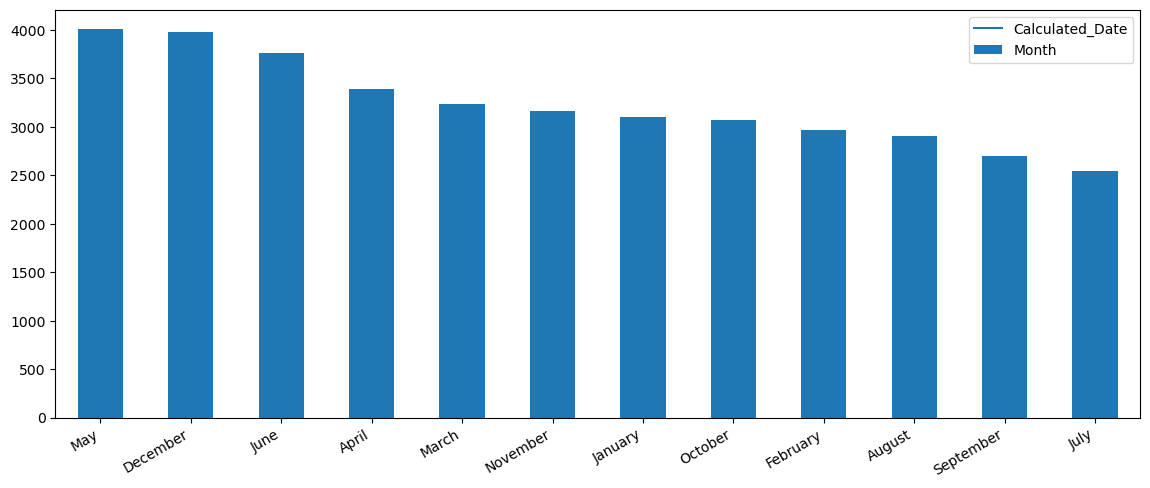

In [20]:
Sales["Month"].value_counts().plot(kind="bar",figsize=(12,6))
plt.legend()

Sales['Calculated_Date'].value_counts().plot(kind="line",figsize=(14,6))
plt.legend()


In [21]:
Sales['Revenue']+250

0        1179
1         972
2        1179
3        1179
4        1426
         ... 
38835    1755
38836    2006
38837    1881
38838    1254
38839    1128
Name: Revenue, Length: 38840, dtype: int64

In [22]:
Sales['Age_Group'].value_counts()

Adults (35-64)          21768
Young Adults (25-34)    11158
Youth (<25)              5641
Seniors (64+)             273
Name: Age_Group, dtype: int64

In [23]:
Sales['Sub_Category'].value_counts()

Tires and Tubes      11554
Bottles and Cages     5762
Helmets               4032
Road Bikes            3791
Mountain Bikes        3023
Jerseys               2046
Fenders               1840
Caps                  1346
Touring Bikes         1124
Gloves                 992
Shorts                 910
Cleaners               704
Hydration Packs        478
Socks                  468
Vests                  372
Bike Racks             242
Bike Stands            156
Name: Sub_Category, dtype: int64

Text(0.5, 0, 'Age')

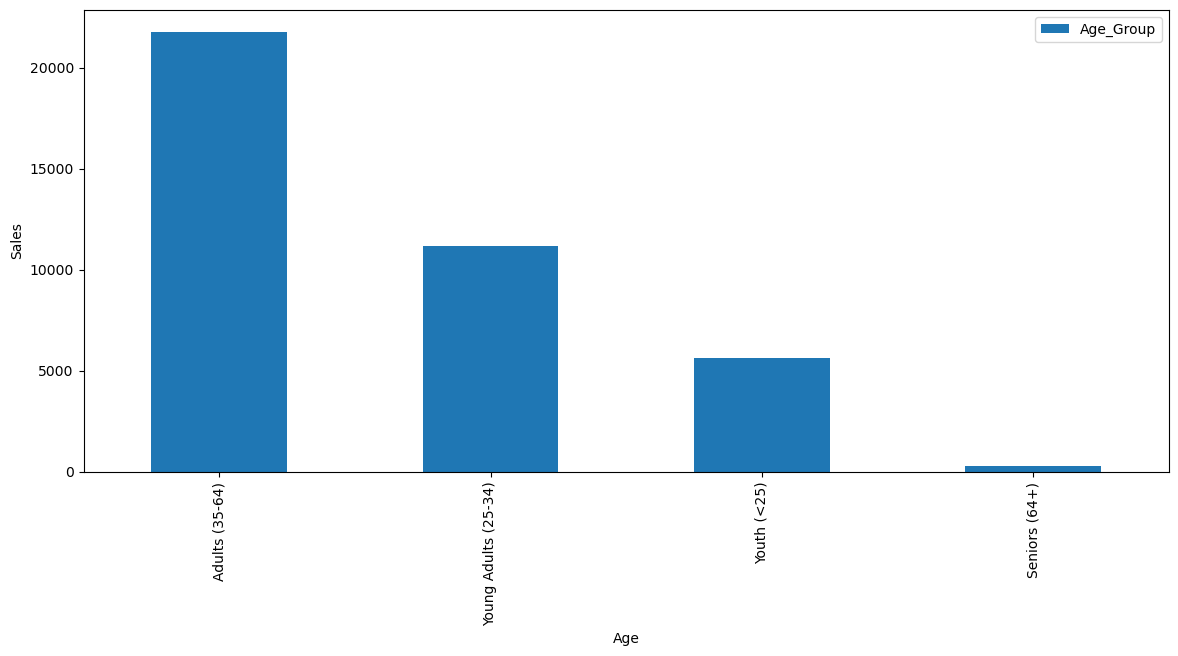

In [24]:
Sales["Age_Group"].value_counts().plot(kind='bar',figsize=(14,6))
plt.legend()
plt.legend()
plt.ylabel("Sales")
plt.xlabel("Age")

In [25]:
Sales["Order_Quantity"].mean()

12.200823892893924

In [26]:
Sales['Country'].value_counts()

United States    38840
Name: Country, dtype: int64

In [27]:
MostSales=Sales.loc[: ,"Product"].unique()

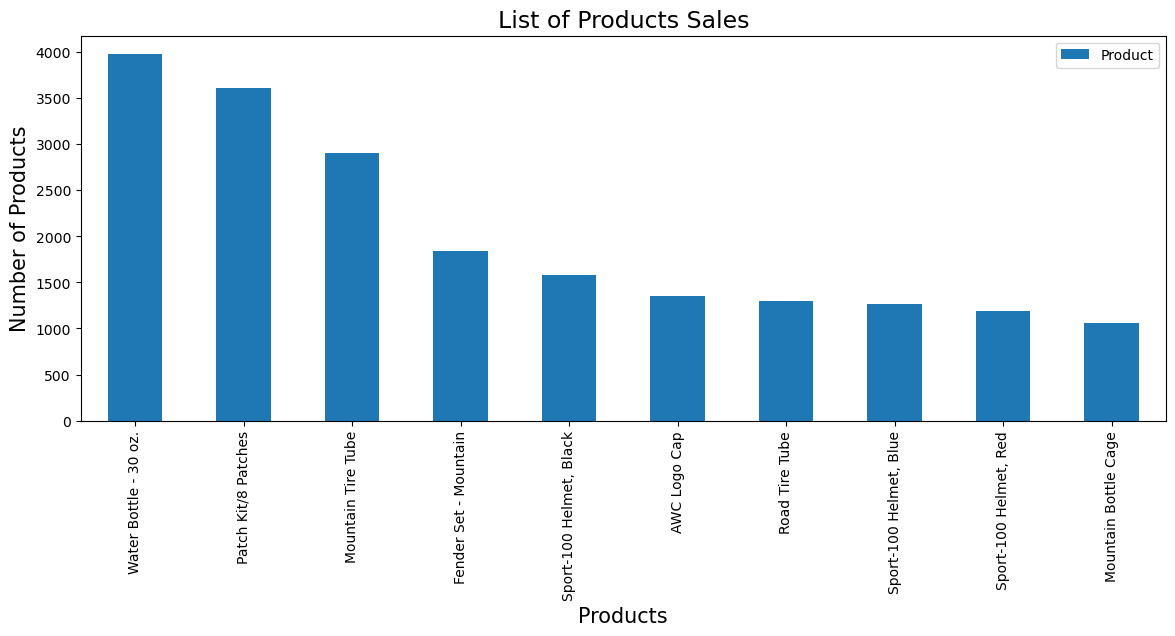

In [28]:
Sales.loc[: ,"Product"].value_counts().head(10).plot(kind='bar',figsize=(14,5))
plt.title("List of Products Sales",fontsize=17)
plt.ylabel("Number of Products",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.legend()


Text(0.5, 0, 'Unit Cost')

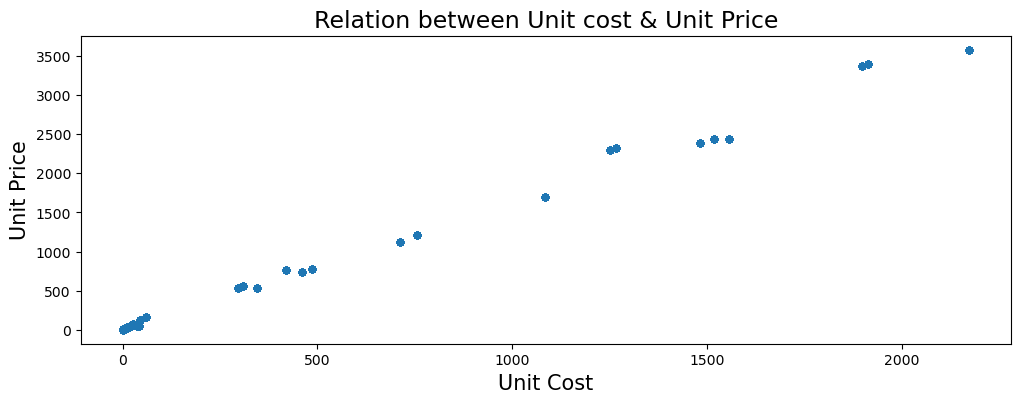

In [29]:
Sales.plot(kind='scatter',x="Unit_Cost", y="Unit_Price",figsize=(12,4),fontsize=10)
plt.title("Relation between Unit cost & Unit Price",fontsize=17)
plt.ylabel("Unit Price",fontsize=15)
plt.xlabel("Unit Cost",fontsize=15)

In [30]:
bike_racks_sales = Sales.loc[Sales['Sub_Category'] == "Bike Racks", 'Country'].value_counts().get('United States', 0)
print("Number of Bike Racks Sales in the United States: ", bike_racks_sales)


Number of Bike Racks Sales in the United States:  242


Text(0.5, 1.0, 'Age Group')

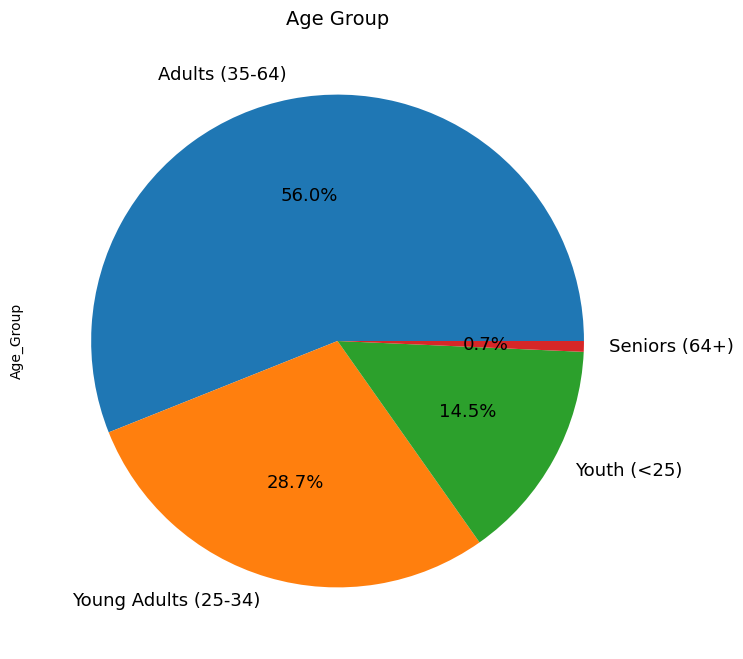

In [31]:
Sales["Age_Group"].value_counts().plot(kind='pie',figsize=(14,8),autopct='%1.1f%%',fontsize=13)
plt.title("Age Group",fontsize=14)


In [32]:
Sales["Order_Quantity"].mean()


12.200823892893924

In [33]:
Sales.value_counts()

Date        Day  Month     Year  Customer_Age  Age_Group       Customer_Gender  Country        State       Product_Category  Sub_Category     Product                     Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  Calculated_Date
2011-01-01  1    January   2011  39            Adults (35-64)  M                United States  Washington  Bikes             Road Bikes       Road-550-W Yellow, 38       3               713        1120        482     2139  2621     2011-01-01         1
2015-11-12  12   November  2015  49            Adults (35-64)  M                United States  Washington  Accessories       Tires and Tubes  Road Tire Tube              28              1          4           59      28    87       2015-11-12         1
2015-11-13  13   November  2015  17            Youth (<25)     M                United States  Washington  Bikes             Mountain Bikes   Mountain-400-W Silver, 40   1               420        769         180     420   600      2015-11-13    

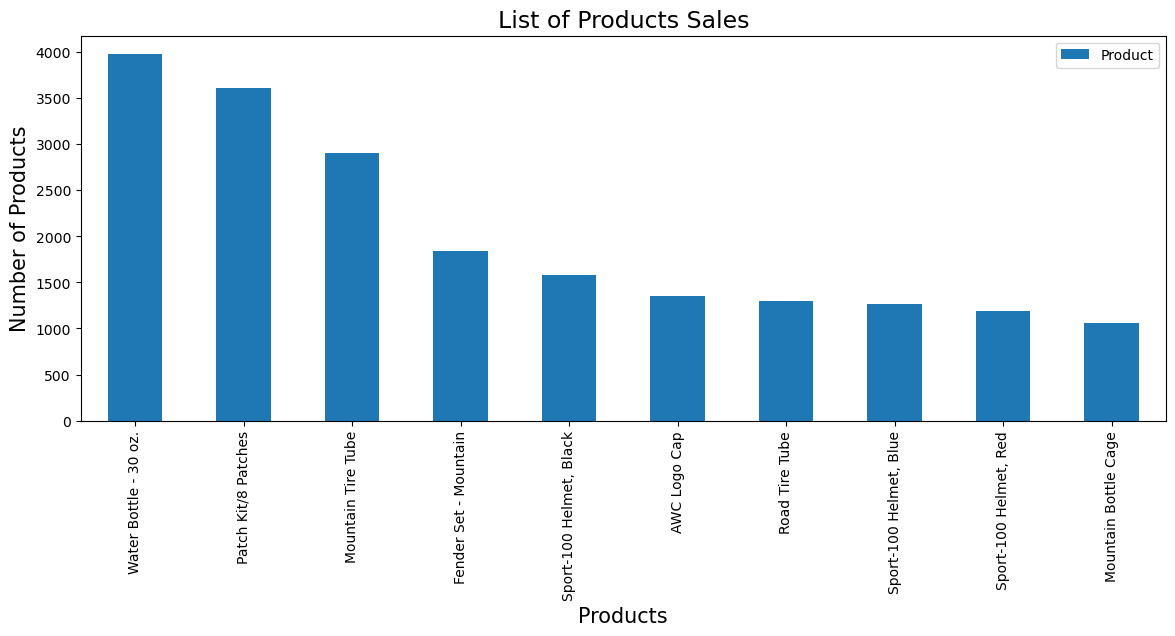

In [34]:
MostSales=Sales.loc[: ,"Product"].unique()
Sales.loc[: ,"Product"].value_counts().head(10).plot(kind='bar',figsize=(14,5))
plt.title("List of Products Sales",fontsize=17)
plt.ylabel("Number of Products",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.legend()

In [35]:
Sales.loc[(Sales['Country']=='United States' ) & (Sales['Sub_Category']=="Bike Racks")].shape[0]

242

In [36]:
Sales["State"].value_counts()


California        22220
Washington        11168
Oregon             5246
Texas                30
Illinois             28
Ohio                 28
New York             20
Florida              14
Kentucky             10
South Carolina       10
Utah                 10
Georgia               8
Wyoming               8
Montana               6
Minnesota             6
Missouri              6
Mississippi           4
Arizona               4
Virginia              4
North Carolina        4
Alabama               4
Massachusetts         2
Name: State, dtype: int64

Text(0.5, 0, 'States')

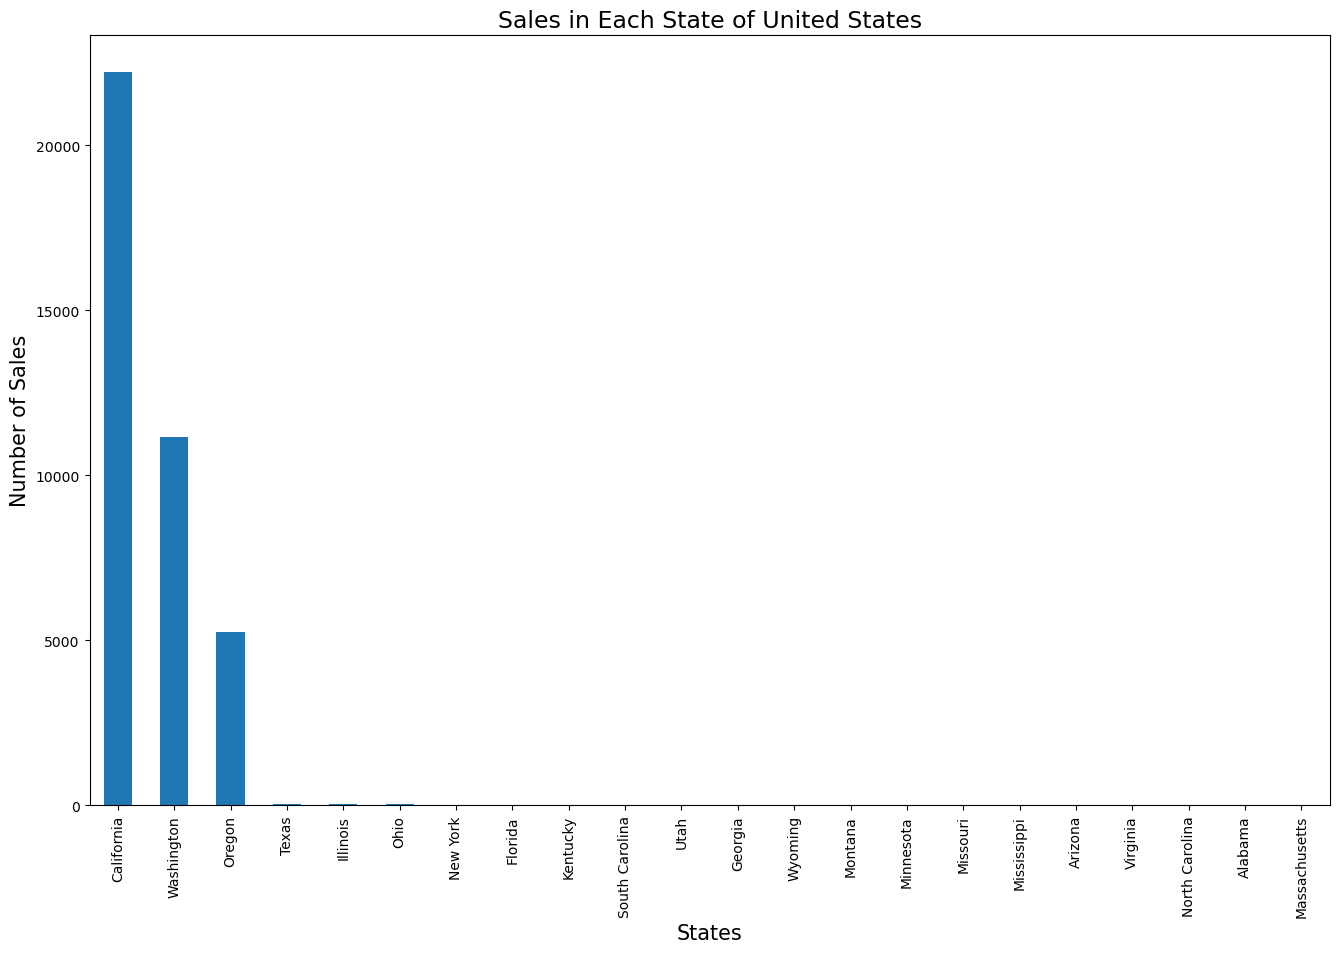

In [37]:
Sales.loc[:, "State"].value_counts().plot(kind='bar', figsize=(16, 10))
plt.title("Sales in Each State of United States", fontsize=17)
plt.ylabel("Number of Sales", fontsize=15)
plt.xlabel("States", fontsize=15)

In [38]:
accessories_subcategory_counts = Sales.loc[Sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
print(accessories_subcategory_counts)


Tires and Tubes      11554
Bottles and Cages     5762
Helmets               4032
Fenders               1840
Cleaners               704
Hydration Packs        478
Bike Racks             242
Bike Stands            156
Name: Sub_Category, dtype: int64


In [39]:
Sales.loc[Sales['Product_Category']=="Bikes","Sub_Category"].value_counts()

Road Bikes        3791
Mountain Bikes    3023
Touring Bikes     1124
Name: Sub_Category, dtype: int64

In [40]:
Sales.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
20735,2011-03-24,24,March,2011,24,Youth (<25),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,8684,14026,2011-03-24
23929,2011-01-03,3,January,2011,39,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5342,8684,14026,2011-01-03
20945,2011-04-29,29,April,2011,28,Young Adults (25-34),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,8684,14026,2011-04-29
20737,2011-03-27,27,March,2011,24,Youth (<25),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,8684,14026,2011-03-27
23778,2011-08-19,19,August,2011,49,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5342,8684,14026,2011-08-19


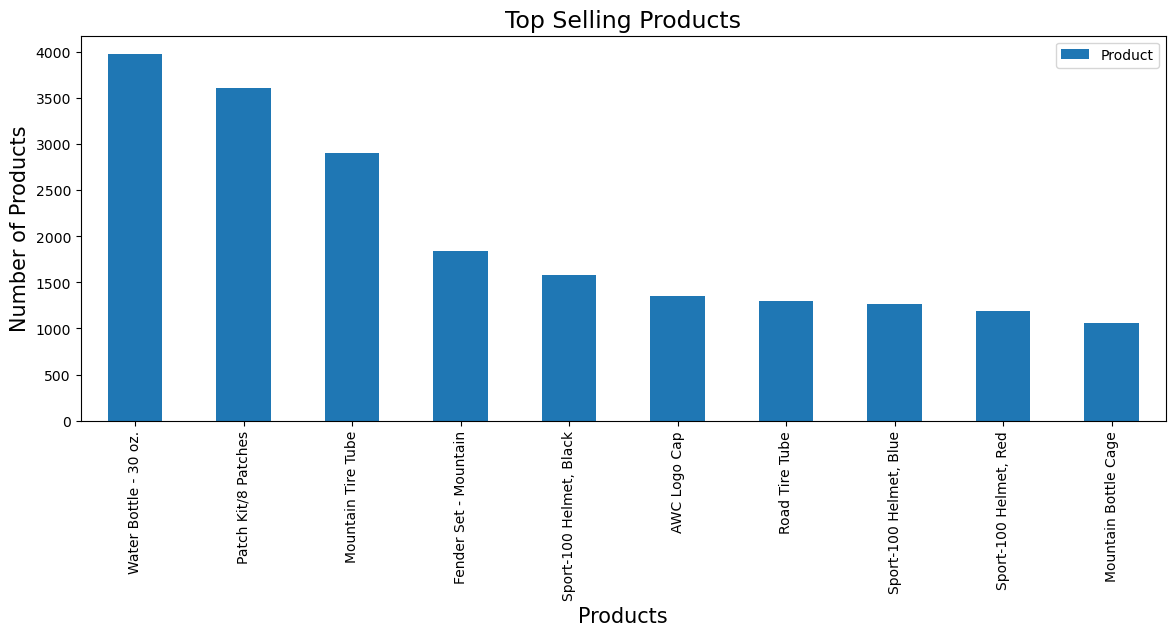

In [41]:
MostSales = Sales['Product'].value_counts().head(10)
MostSales.plot(kind='bar', figsize=(14, 5))
plt.title("Top Selling Products", fontsize=17)
plt.ylabel("Number of Products", fontsize=15)
plt.xlabel("Products", fontsize=15)
plt.legend()
plt.show()


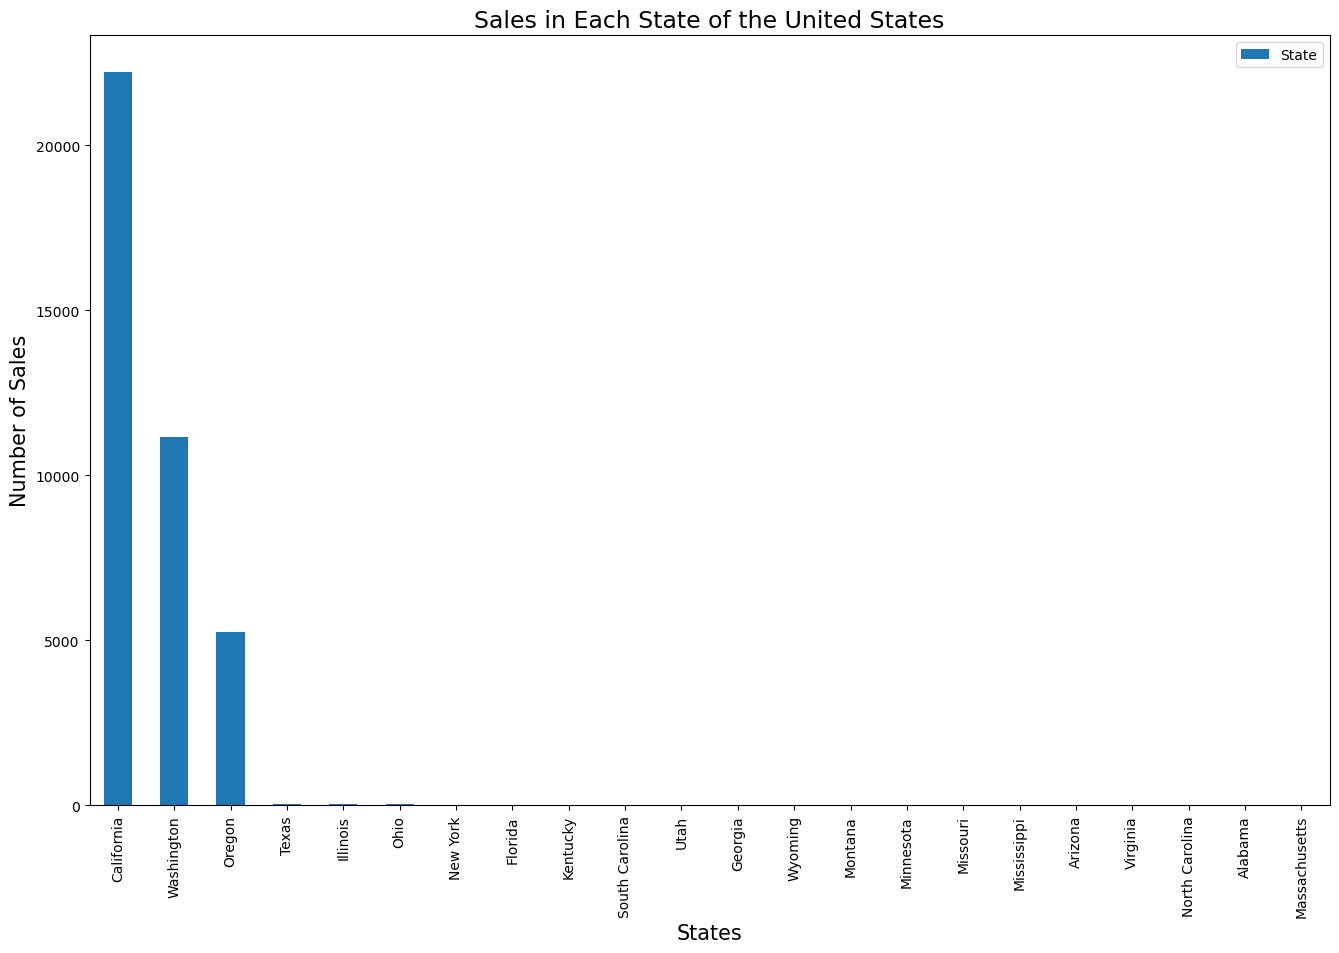

In [42]:
StateSales = Sales.loc[Sales['Country'] == 'United States', 'State'].value_counts()
StateSales.plot(kind='bar', figsize=(16, 10))
plt.title("Sales in Each State of the United States", fontsize=17)
plt.ylabel("Number of Sales", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.legend()
plt.show()


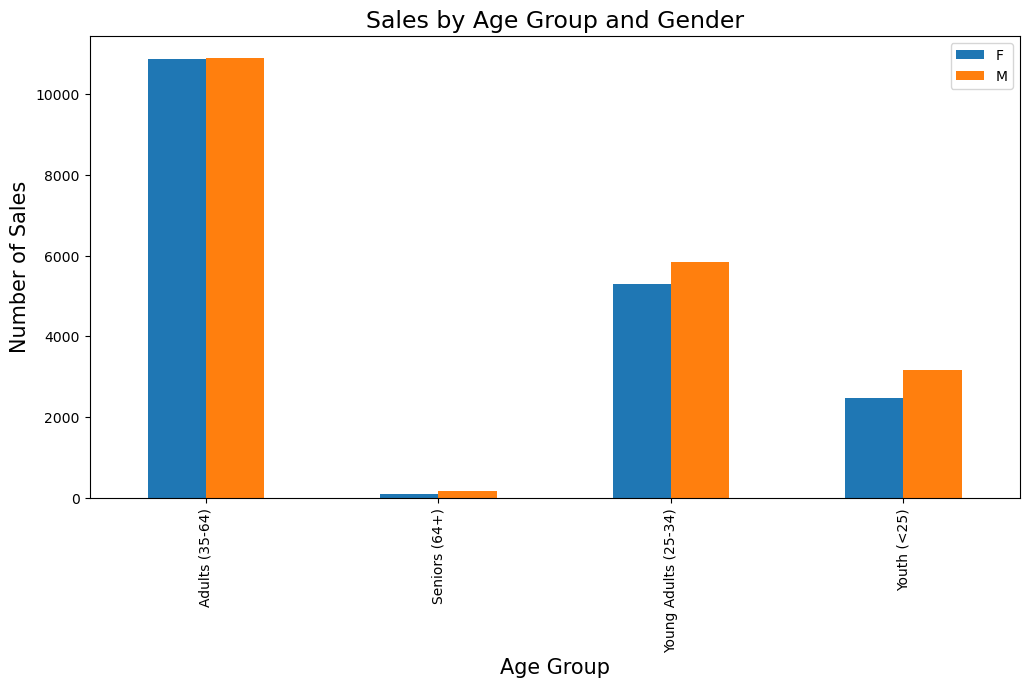

In [43]:
AgeGenderSales = Sales.loc[Sales['Country'] == 'United States'].groupby(['Age_Group', 'Customer_Gender']).size().unstack()
AgeGenderSales.plot(kind='bar', figsize=(12, 6))
plt.title("Sales by Age Group and Gender", fontsize=17)
plt.ylabel("Number of Sales", fontsize=15)
plt.xlabel("Age Group", fontsize=15)
plt.legend()
plt.show()


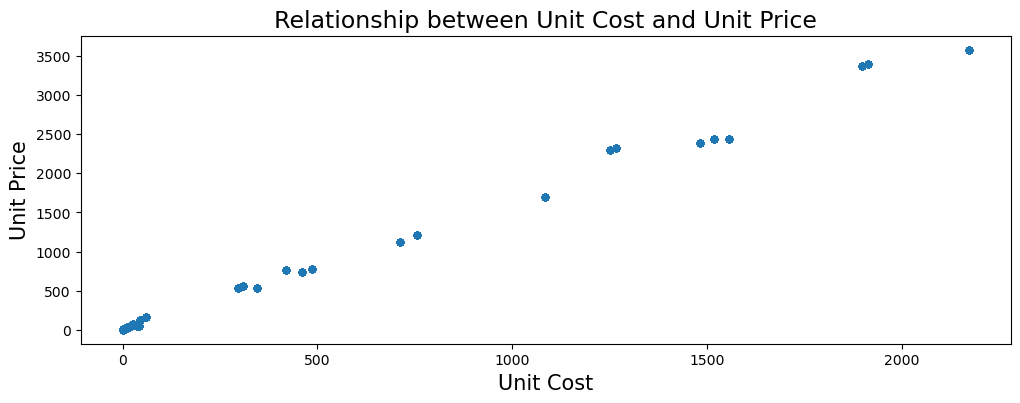

In [44]:
Sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(12, 4), fontsize=10)
plt.title("Relationship between Unit Cost and Unit Price", fontsize=17)
plt.ylabel("Unit Price", fontsize=15)
plt.xlabel("Unit Cost", fontsize=15)
plt.show()


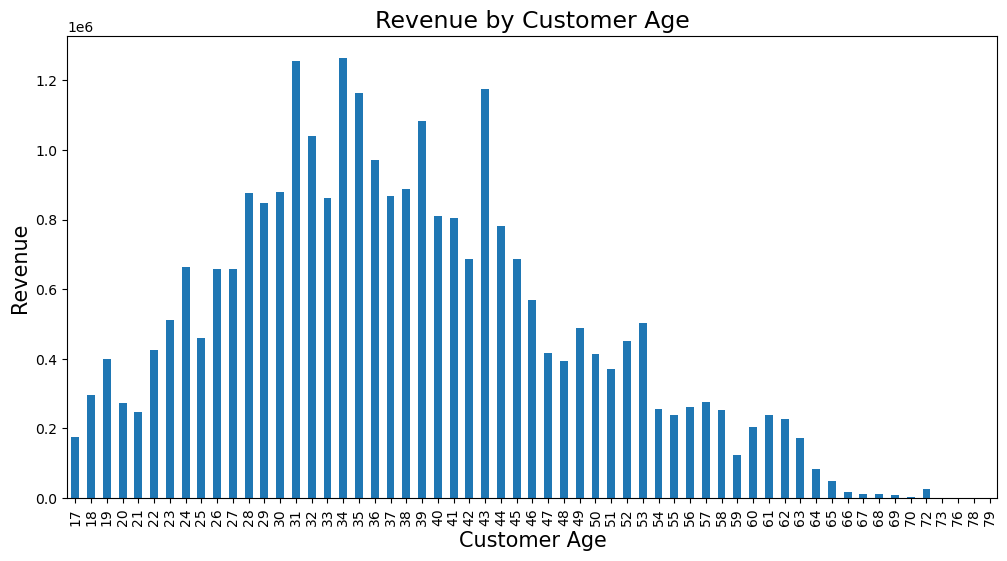

In [45]:
CustomerAgeSales = Sales.loc[Sales['Country'] == 'United States'].groupby('Customer_Age')['Revenue'].sum()
CustomerAgeSales.plot(kind='bar', figsize=(12, 6))
plt.title("Revenue by Customer Age", fontsize=17)
plt.xlabel("Customer Age", fontsize=15)
plt.ylabel("Revenue", fontsize=15)
plt.show()


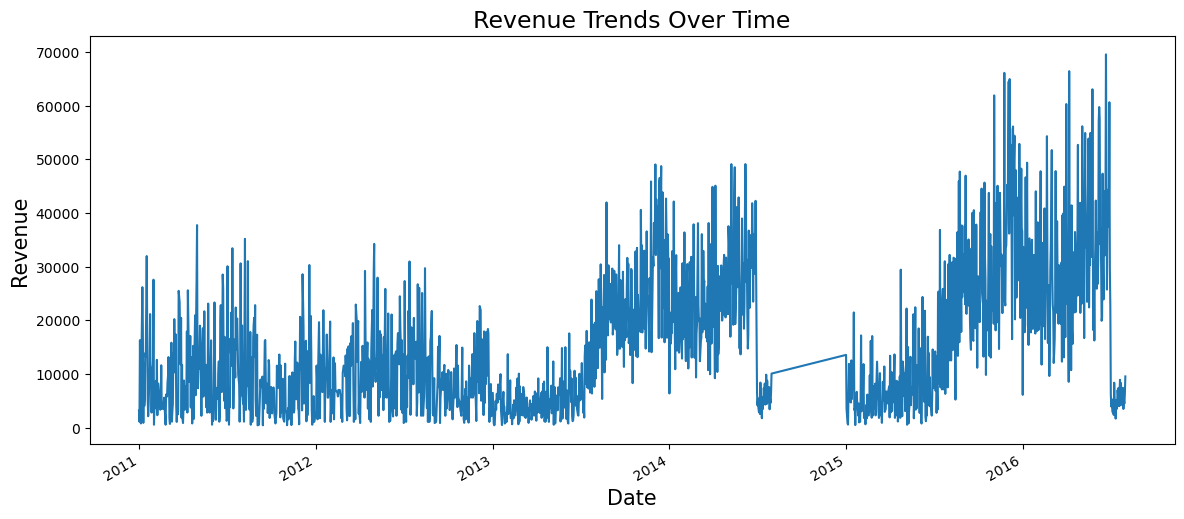

In [46]:
Sales['Calculated_Date'] = pd.to_datetime(Sales['Calculated_Date'])
RevenueTrends = Sales.groupby('Calculated_Date')['Revenue'].sum()
RevenueTrends.plot(kind='line', figsize=(14, 6))
plt.title("Revenue Trends Over Time", fontsize=17)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Revenue", fontsize=15)
plt.show()
